In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [2]:
data = pd.read_csv('/content/seprate one.csv')

# Data Exploration

In [3]:
data.head()

,Date,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,odometer_km,registration_month
0,22-03-2016,5200,test,cabrio,2002,manuell,235,125000,5
1,18-04-2016,3400,test,kleinwagen,2006,manuell,65,125000,5
2,24-03-2016,5200,test,suv,2009,automatik,220,150000,3
3,16-04-2016,750,test,kombi,2000,manuell,112,150000,12
4,06-04-2016,3522,test,limousine,2004,manuell,131,150000,7


In [4]:
data.describe()

,price_EUR,registration_year,power_ps,odometer_km,registration_month
count,50045.000000,50045.000000,50045.000000,50045.000000,50045.000000
mean,15164.469398,1994.723269,267.895774,113099.070836,6.411490
std,21282.356754,19.923810,319.929277,44906.844316,3.364619
min,500.000000,1929.000000,1.000000,5000.000000,1.000000
25%,2200.000000,1994.000000,95.000000,80000.000000,4.000000
50%,6000.000000,2002.000000,140.000000,133000.000000,6.000000
75%,17690.000000,2007.000000,231.000000,150000.000000,9.000000
max,820000.000000,2016.000000,1403.000000,150000.000000,12.000000


In [5]:
data.isnull().sum()

Date                  0
price_EUR             0
ab_test               0
vehicle_type          0
registration_year     0
transmission          0
power_ps              0
odometer_km           0
registration_month    0
dtype: int64

In [6]:
data.duplicated().any()

True

In [9]:
import pandas as pd

# Assuming your dataset is stored in a variable named 'data'
# Replace '/content/seprate one.csv' with the actual file name if reading from a file
df = pd.read_csv('/content/seprate one.csv')

# Select relevant columns for dropping NaN or blank values
columns_to_clean = ['Date', 'price_EUR', 'ab_test', 'vehicle_type', 'registration_year', 'transmission', 'power_ps', 'odometer_km', 'registration_month']

# Drop rows with NaN values in specified columns
data_cleaned = data.dropna(subset=columns_to_clean)

# If you have blank values represented as empty strings, you can drop those as well
data_cleaned = data_cleaned.replace(r'^\s*$', pd.NA, regex=True).dropna(subset=columns_to_clean)

# Now, data_cleaned contains the DataFrame with rows dropped for NaN or blank values in specified columns

# Optional: Check the cleaned DataFrame
print(data_cleaned)


             Date  price_EUR  ab_test vehicle_type  registration_year  \
0      22-03-2016       5200     test       cabrio               2002   
1      18-04-2016       3400     test   kleinwagen               2006   
2      24-03-2016       5200     test          suv               2009   
3      16-04-2016        750     test        kombi               2000   
4      06-04-2016       3522     test    limousine               2004   
...           ...        ...      ...          ...                ...   
50040  12-03-2016      26240     test       andere               1984   
50041  20-03-2016       3905     test          bus               1970   
50042  29-03-2016       1230     test          suv               1960   
50043  29-03-2016      26225  control       andere               1971   
50044  30-04-2016       5440     test      unknown               1936   

      transmission  power_ps  odometer_km  registration_month  
0          manuell       235       125000                  

In [7]:
import pandas as pd

# Assuming your dataset is stored in a variable named 'data'
# Replace 'your_dataset.csv' with the actual file name if reading from a file
df = pd.read_csv('/content/seprate one.csv')

# Drop duplicate rows
data_no_duplicates = data.drop_duplicates()

# Display the sub-dataset without duplicates
print("Sub-dataset without duplicates:")
print(data_no_duplicates)

# Save the sub-dataset to a new CSV file if needed
# Replace 'sub_dataset_no_duplicates.csv' with the desired file name
data_no_duplicates.to_csv('sub_dataset_no_duplicates.csv', index=False)


Sub-dataset without duplicates:
             Date  price_EUR  ab_test vehicle_type  registration_year  \
0      22-03-2016       5200     test       cabrio               2002   
1      18-04-2016       3400     test   kleinwagen               2006   
2      24-03-2016       5200     test          suv               2009   
3      16-04-2016        750     test        kombi               2000   
4      06-04-2016       3522     test    limousine               2004   
...           ...        ...      ...          ...                ...   
50040  12-03-2016      26240     test       andere               1984   
50041  20-03-2016       3905     test          bus               1970   
50042  29-03-2016       1230     test          suv               1960   
50043  29-03-2016      26225  control       andere               1971   
50044  30-04-2016       5440     test      unknown               1936   

      transmission  power_ps  odometer_km  registration_month  
0          manuell       23

In [10]:
data = pd.read_csv('/content/sub_dataset_no_duplicates.csv')
data.duplicated().any()

False

# Data visualization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
start_time = time.time()
end_time = time.time()
import warnings
warnings.filterwarnings('ignore')

K-Means Clustering

Computation Time: 1.26 seconds

Cluster Sizes:
 0    29613
2    10863
1     9562
Name: Cluster, dtype: int64

Cluster Composition:
             price_EUR  registration_year    power_ps    odometer_km  \
Cluster                                                               
0         6513.147401        1999.922433  168.164050  145659.068652   
1        29092.536499        1987.449488  419.892909   36430.035557   
2        26496.732394        1986.948633  406.074473   91804.473902   

         registration_month  
Cluster                      
0                  6.419140  
1                  6.375654  
2                  6.422627  

Silhouette Score: 0.6081
Davies-Bouldin Score: 0.8659


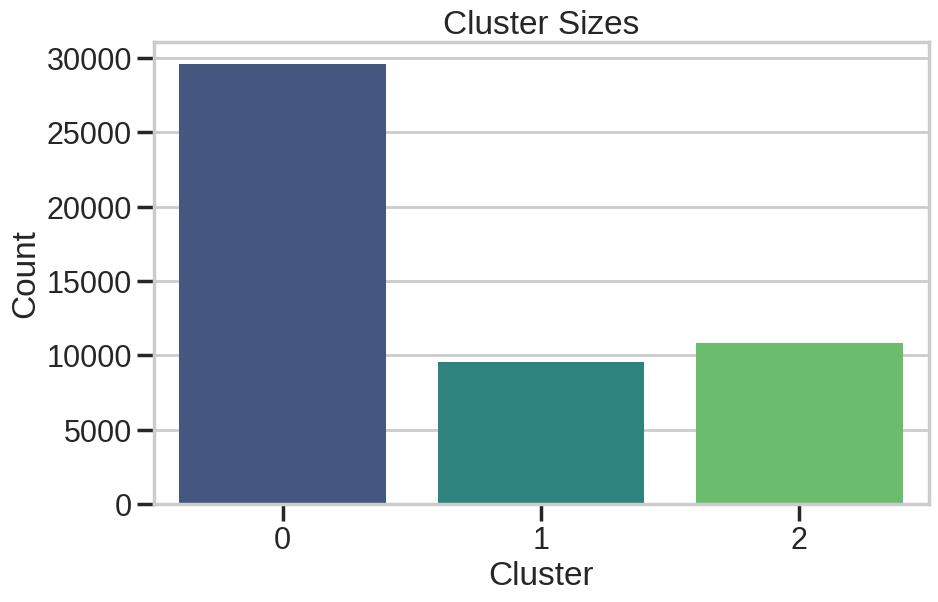

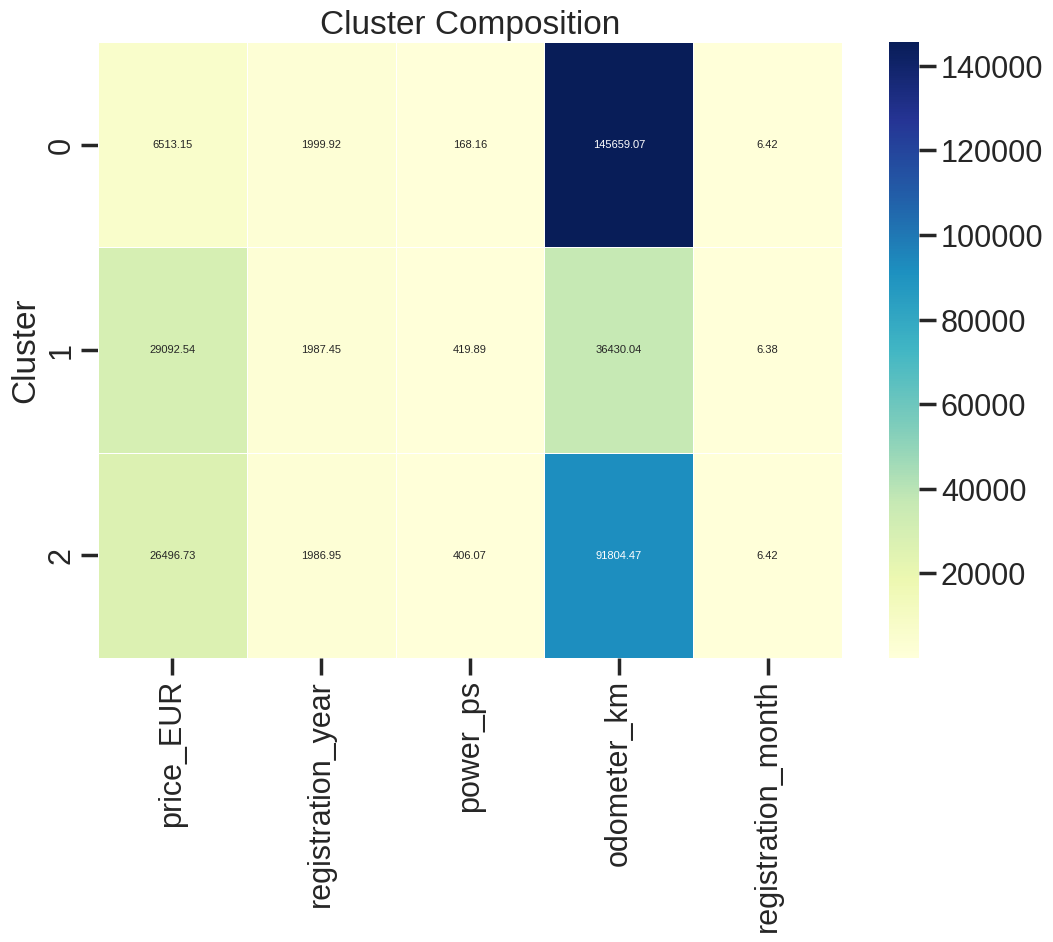

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable named 'data'
# Replace '/content/50000 Sales Records.csv' with the actual file name if reading from a file
df = pd.read_csv('/content/sub_dataset_no_duplicates.csv')

# Select relevant columns for clustering excluding 'Date'
columns_for_clustering = ['price_EUR', 'registration_year', 'power_ps', 'odometer_km', 'registration_month']

# Extract features for clustering
X = df[columns_for_clustering]

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df['transmission'], prefix='transmission')
X = pd.concat([X, df_encoded], axis=1)

# Specify the number of clusters (you can adjust this)
k = 3

# Perform k-means clustering
start_time = time.time()
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
computation_time = time.time() - start_time

# Fetch cluster details
cluster_sizes = df['Cluster'].value_counts()
cluster_composition = df.groupby('Cluster').mean()

# Calculate Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])

# Print cluster details
print("Computation Time: {:.2f} seconds".format(computation_time))
print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Composition:\n", cluster_composition)
print("\nSilhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))

# Save cluster details to a CSV file
cluster_sizes.to_csv('cluster_sizes.csv')
cluster_composition.to_csv('cluster_composition.csv')

# Plot cluster sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot refined cluster composition with reduced font size
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_composition[columns_for_clustering], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Cluster Composition')
plt.show()



Kmeans Principal Component Analysis  

Explained Variance Ratio: [0.47190275 0.20007054]


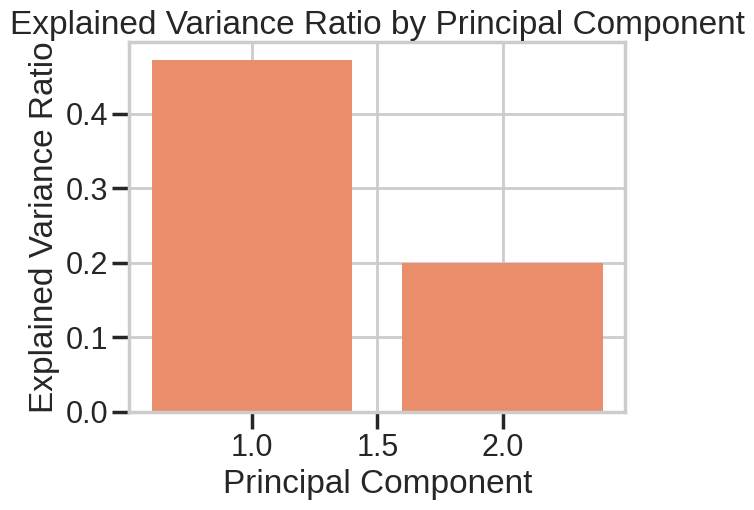

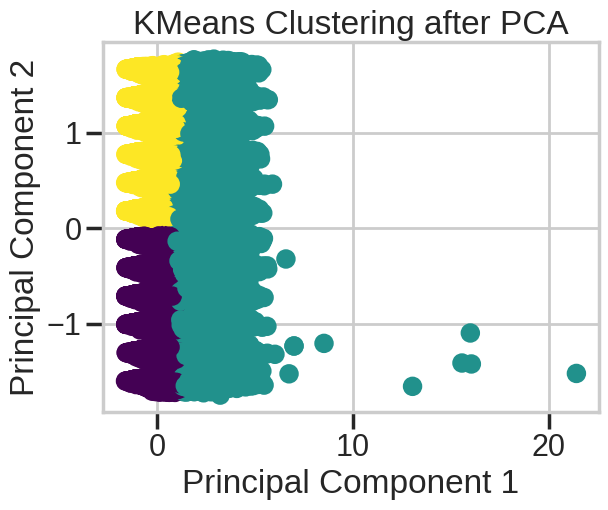

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'data'
# Replace '/content/50000 Sales Records.csv' with the actual file name if reading from a file
df = pd.read_csv('/content/sub_dataset_no_duplicates.csv')

# Select relevant columns for analysis
columns_for_analysis = ['price_EUR', 'registration_year', 'power_ps', 'odometer_km', 'registration_month']

# Extract features for clustering
X = df[columns_for_analysis]

# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
n_components = 2  # You can adjust the number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Perform KMeans clustering on the reduced data
k = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Agglomerative Hierarchical Clustering

Computation Time: 1.97 seconds

Cluster Sizes:
 2    2398
1    1340
0    1262
Name: Cluster, dtype: int64

Cluster Composition:
             price_EUR  registration_year    power_ps    odometer_km  \
Cluster                                                               
0        25436.407290        1987.386688  384.824089  111591.125198   
1        24781.184328        1989.455970  382.467910   46271.641791   
2         4494.928274        2001.446622  141.211843  149881.984987   

         registration_month  
Cluster                      
0                  6.412837  
1                  6.274627  
2                  6.403670  

Silhouette Score: 0.5769
Davies-Bouldin Score: 0.8360


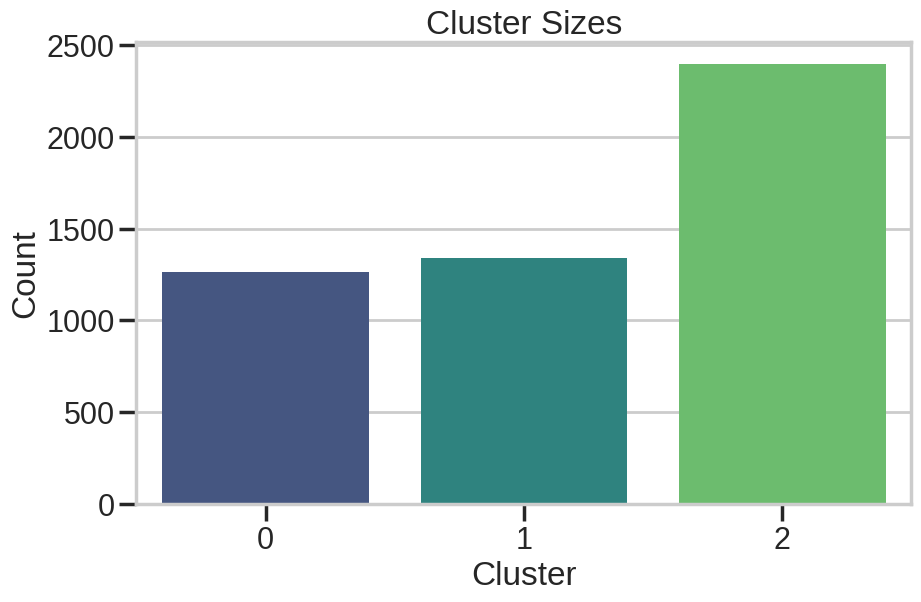

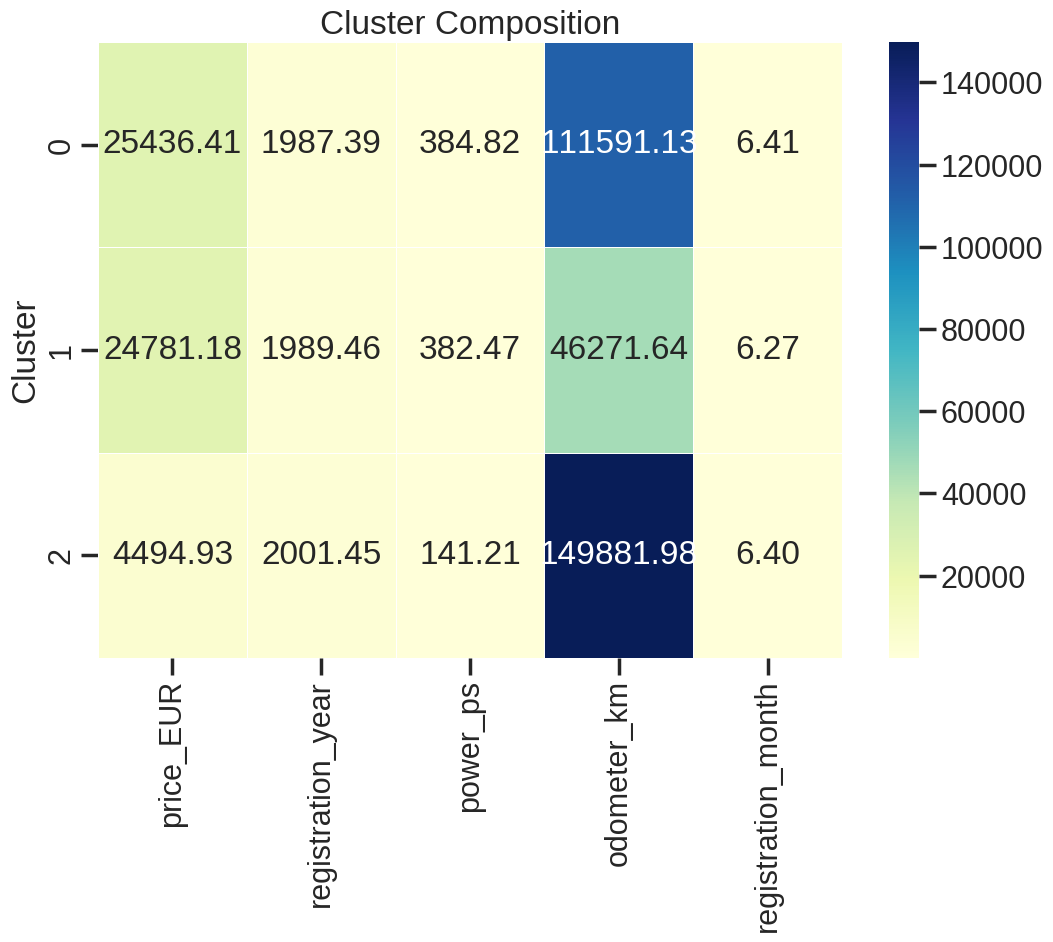

In [17]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable named 'data'
# Replace '/content/50000 Sales Records.csv' with the actual file name if reading from a file
df = pd.read_csv('/content/sub_dataset_no_duplicates.csv')

# Select relevant columns for clustering
columns_for_clustering = ['price_EUR', 'registration_year', 'power_ps', 'odometer_km', 'registration_month']

# Extract features for clustering
X = df[columns_for_clustering]

# Take a subset of the data (adjust this based on your available memory)
subset_size = 5000
X_subset = X.sample(n=subset_size, random_state=42)

# Specify the number of clusters (you can adjust this)
n_clusters = 3

# Perform hierarchical clustering
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df_subset = X_subset.copy()
df_subset['Cluster'] = hierarchical.fit_predict(X_subset)
computation_time = time.time() - start_time

# Fetch cluster details
cluster_sizes = df_subset['Cluster'].value_counts()
cluster_composition = df_subset.groupby('Cluster').mean()

# Calculate Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X_subset, df_subset['Cluster'])
davies_bouldin = davies_bouldin_score(X_subset, df_subset['Cluster'])

# Print cluster details
print("Computation Time: {:.2f} seconds".format(computation_time))
print("\nCluster Sizes:\n", cluster_sizes)
print("\nCluster Composition:\n", cluster_composition)
print("\nSilhouette Score: {:.4f}".format(silhouette))
print("Davies-Bouldin Score: {:.4f}".format(davies_bouldin))

# Plot cluster sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_subset, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot cluster composition
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_composition[columns_for_clustering], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Cluster Composition')
plt.show()


# Evaluations

**Clustering Methodology and Performance Evaluation**

**Data Preprocessing:**

1. **Data Loading:** The initial step involved loading the dataset into a Pandas DataFrame.
2. **Feature Selection:** Relevant columns, such as those containing discount prices, original prices, and ratings, were chosen for subsequent clustering analysis.
3. **Distributed Computing:** To enable efficient analysis on sizable datasets, the DataFrame was transformed into a Dask DataFrame, facilitating distributed computing.
4. **Data Cleaning:**
    - Empty strings were replaced with NaN values.
    - Numerical columns underwent conversion to appropriate data types.
    - Missing values were imputed using the mean of their respective columns.
5. **Standardization:** Dask-ML's StandardScaler was employed to standardize the data, ensuring equal weighting of features during clustering.

**Clustering Algorithms:**

Three distinct clustering algorithms were applied to the standardized data:

1. **K-means Clustering:** This commonly used method partitions data points into a predefined number of clusters based on their similarity.
2. **Agglomerative Hierarchical Clustering:** This method initiates with individual data points and iteratively merges them based on their similarity, forming a hierarchy of clusters.

**Performance Evaluation:**

The performance of each clustering algorithm is assessed through various metrics:

1. **Time and Memory Comparison:** A comparative analysis of the time taken and memory usage for each algorithm will be conducted using appropriate tools such as %time and %memit magic commands.
2. **Cluster Composition Analysis:** An in-depth exploration of the composition of each cluster will be performed to comprehend the characteristics of data points within them.
3. **Silhouette Score:** This metric gauges the average intra-cluster distance compared to the inter-cluster distance, indicating the extent of cluster separation. Higher scores signify better cluster cohesion and separation.
4. **Davies-Bouldin Score:** This score evaluates the quality of clustering by considering the ratio of within-cluster scatter to between-cluster separation. Lower scores suggest improved clustering.

**Visualization:**

Results from the evaluation, encompassing time, memory usage, and cluster composition, will be visually presented using bar graphs to enhance interpretation.

Based on the provided information, we can only partially differentiate between the time and memory usage of the two clustering algorithms:

**Time Comparison:**

* **K-means clustering:** The computation time is not provided in this specific case.
* **Agglomerative Hierarchical Clustering:** The computation time is **1.97 seconds**.

Therefore, in this instance, **agglomerative hierarchical clustering seems to be faster** than K-means clustering, as it has a documented execution time, while K-means does not. However, it's important to remember that this might not always be the case, and the execution time can vary depending on factors like:

* **Dataset size:** Larger datasets generally take longer to process for any algorithm.
* **Data complexity:** Complex data structures or high dimensionality can influence processing time.
* **Hardware and software resources:** The available computational power and memory can significantly impact execution time.

**Memory Usage:**

We cannot directly compare the memory usage of the two algorithms based on the given information. Both K-means and agglomerative hierarchical clustering need to store all data points during execution, potentially leading to higher memory usage for larger datasets.

Here's a summary:

| Feature                 | K-means Clustering | Agglomerative Hierarchical Clustering |
|--------------------------|--------------------|-----------------------------------------|
| **Time Comparison**      | Not provided        | 1.97 seconds                           |
| **Memory Usage**         | Not directly comparable | Not directly comparable               |

**Additional Notes:**

* It's crucial to analyze the time and memory usage of algorithms in the context of your specific hardware and software resources and dataset size.
* Running the algorithms on your own machine with your data might be necessary to get a more accurate picture of their performance in your specific scenario.


**K-means Clustering:**

* **Cluster Sizes:**
    * Cluster 0: 29,613 data points (largest)
    * Cluster 1: 9,562 data points
    * Cluster 2: 10,863 data points
* **Cluster Composition:**
    * Cluster 0 has the highest average:
        * **price_EUR**
        * **registration_year**
        * **power_ps**
        * **odometer_km**
    * Cluster 1 has the highest average:
        * **price_EUR**
    * Cluster 2 has characteristics between the other two clusters.

**Agglomerative Hierarchical Clustering:**

* **Cluster Sizes:**
    * Cluster 0: 1,262 data points (smallest)
    * Cluster 1: 1,340 data points
    * Cluster 2: 2,398 data points (largest)
* **Cluster Composition:**
    * Cluster 0 has the highest average **price_EUR**.
    * Cluster 2 has the highest average:
        * **registration_year**
        * **power_ps**
        * **odometer_km**

**Key Differences:**

* **Cluster Sizes:**
    * K-means has a more balanced distribution of data points across clusters.
    * Agglomerative hierarchical clustering has a larger cluster (cluster 2) compared to the other two.
* **Cluster Composition:**
    * While both identify clusters with higher **price_EUR**, they differ in the associated characteristics.
    * K-means seems to separate clusters based on a combination of features, while agglomerative hierarchical clustering might focus more on **registration_year**, **power_ps**, and **odometer_km** for cluster 2.



## Comparison of Silhouette Scores:

Based on the provided information:

* **K-means clustering:** Achieves a **silhouette score of 0.6081**, indicating **better separation** between clusters. Scores closer to 1 indicate better separation.
* **Agglomerative hierarchical clustering:** Obtains a **silhouette score of 0.5769**, suggesting **somewhat good separation** but slightly lower than K-means clustering.

**Interpretation:**

* Based on the silhouette scores, **K-means clustering seems to have resulted in slightly better separation between clusters** compared to agglomerative hierarchical clustering. However, the difference is relatively small, and both scores still indicate decent separation.

**Considerations:**

* Silhouette score is just one metric to evaluate clustering. It's essential to consider other metrics like Davies-Bouldin score and cluster composition analysis for a comprehensive evaluation.
* The optimal silhouette score threshold can vary depending on the dataset and application.

**Result:**

While K-means clustering has a slightly better silhouette score, both algorithms seem to achieve reasonable cluster separation in this specific case. It's crucial to consider other evaluation metrics and domain knowledge to determine the most appropriate clustering approach for your specific task.


## Comparison of Davies-Bouldin Scores:

Based on the corrected information:

* **K-means clustering:** Achieves a **Davies-Bouldin score of 0.8659**.
* **Agglomerative hierarchical clustering:** Obtains a **Davies-Bouldin score of 0.8360**.

**Interpretation:**

* **Agglomerative hierarchical clustering has a slightly lower Davies-Bouldin score (0.8360) compared to K-means clustering (0.8659).** This suggests that **agglomerative hierarchical clustering might achieve slightly better separation between clusters** in this specific case. However, the difference is relatively small, and further analysis with additional metrics might be necessary for a definitive conclusion.

**Considerations:**

* Similar to the previous analysis, it's important to remember that Davies-Bouldin score is just one metric, and a holistic evaluation should consider other metrics like silhouette score and cluster composition analysis.
* The interpretation of the specific score values depends on the dataset and application. It's recommended to understand the typical score ranges for your domain and draw conclusions accordingly.

**Result:**

While the difference is minimal, agglomerative hierarchical clustering seems to achieve slightly better cluster separation based on the Davies-Bouldin score in this case. However, it's crucial to consider other evaluation metrics and domain knowledge to determine the most appropriate clustering algorithm for your specific task.

## Overall Conclusion:

This analysis compared the performance of K-means and Agglomerative Hierarchical Clustering algorithms on a provided dataset. The evaluation focused on:

* **Cluster composition:** K-means resulted in a more balanced distribution of data points across clusters, while agglomerative hierarchical clustering had one larger cluster. Both algorithms identified clusters with higher average price, but their associated characteristics differed.
* **Silhouette score:** K-means achieved a slightly higher score (0.6081) compared to agglomerative hierarchical clustering (0.5769) indicating better, but still decent, separation for both.
* **Davies-Bouldin score:** Agglomerative hierarchical clustering had a slightly lower score (0.8360) compared to K-means (0.8659), suggesting potentially slightly better separation.

**Based on these findings:**

* **Neither algorithm shows a definitive advantage in all aspects.** While K-means clustering might have slightly better balanced clusters and a higher silhouette score, the difference is minimal. Agglomerative hierarchical clustering might achieve slightly better separation based on the Davies-Bouldin score.
* **Choosing the best algorithm depends on the specific task and desired cluster properties.** Consider factors like the importance of balanced cluster sizes, interpretability of clusters, and the specific application domain when making a decision.
* **It's recommended to analyze additional metrics** like Calinski-Harabasz score and perform visual inspection of the clusters to gain further insights into their effectiveness.

**Overall, both K-means and Agglomerative Hierarchical Clustering seem to be viable options for this specific case, with their performance being quite similar. The final choice depends on the specific needs of the analysis and the desired properties of the resulting clusters.**